# Introduction to machine learning using sci kit learn

In [32]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import numpy.random as rnd
import os

# to make this notebook's output stable across runs
rnd.seed(42)

mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

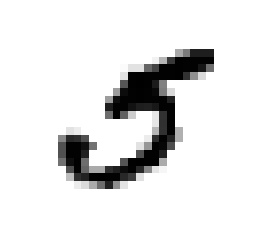

In [33]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

some_digit_index = 36000
some_digit = X[some_digit_index]
plot_digit(some_digit)
plt.show()

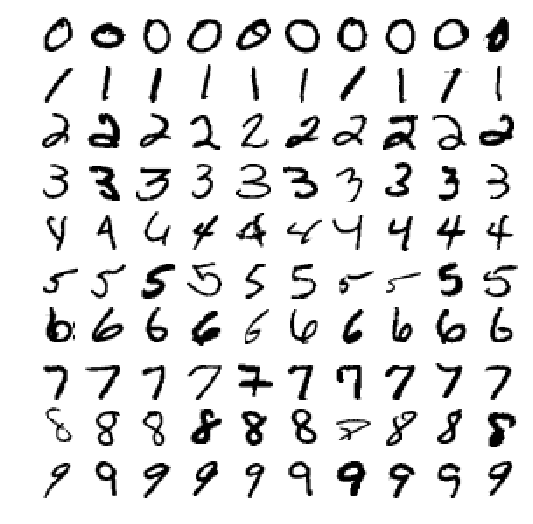

In [34]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

# Split the data into a training set, and a test set

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[10000:], y[:60000], y[10000:]

shuffle_index = rnd.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


# Create a Decision Tree Classifer

In [36]:
from sklearn.model_selection import cross_val_predict

from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Measure how well our classifier did and peek at some incorrect predicitons

[ 0.86352729  0.85739287  0.8633295 ]
PREDICTED
5.0
ACTUAL
0.0


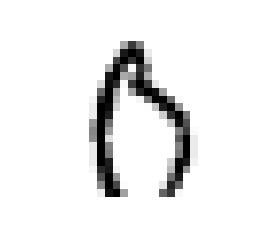

PREDICTED
6.0
ACTUAL
0.0


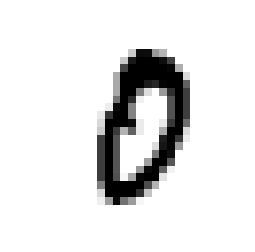

PREDICTED
5.0
ACTUAL
0.0


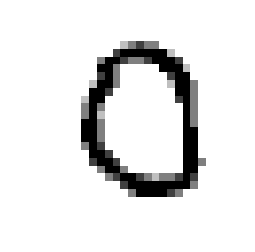

PREDICTED
8.0
ACTUAL
0.0


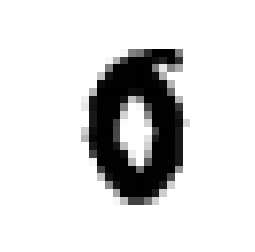

PREDICTED
3.0
ACTUAL
0.0


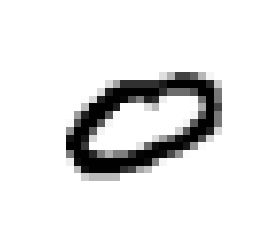

PREDICTED
7.0
ACTUAL
0.0


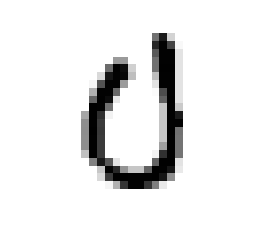

PREDICTED
9.0
ACTUAL
0.0


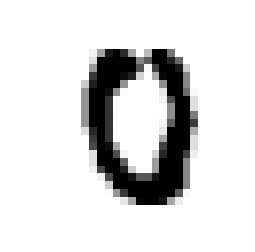

PREDICTED
6.0
ACTUAL
0.0


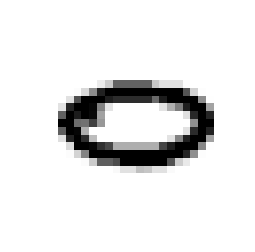

PREDICTED
8.0
ACTUAL
0.0


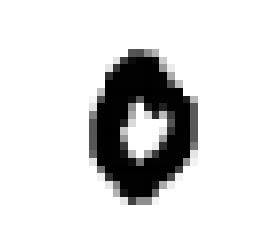

PREDICTED
8.0
ACTUAL
0.0


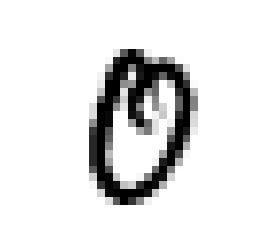

0.8742


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print(cross_val_score(decision_tree_clf, X_train, y_train, scoring="accuracy"))
y_test_pred = decision_tree_clf.predict(X_test)

count = 0
for i in range(len(y_test_pred)):
    if y_test_pred[i] != y_test[i]:
        count = count + 1
        if count >= 11:
            break
        print("PREDICTED")
        print(y_test_pred[i])
        print("ACTUAL")
        print(y_test[i])
        plot_digit(X_test[i])
        plt.show()

print(accuracy_score(y_test, y_test_pred))

# K Nearest Neighbors Classifer
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

# Measure accuracy of our KNN Classifier


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# print(cross_val_score(knn_clf, X_train, y_train, scoring="accuracy", cv=2))
y_test_pred = knn_clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'weights':('uniform', 'distance'), 'leaf_size':[10, 20, 30, 35, 40, 45]}
knn = KNeighborsClassifier(n_jobs=-1)
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)

y_test_pred = clf.best_estimator_.predict(X_test)

print(accuracy_score(y_test, y_test_pred))

# Ensemble Learning with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)


y_test_pred = random_forest_clf.predict(X_test)

print(accuracy_score(y_test, y_test_pred))